# Exploratory Data Analysis - Package.json in GitHub repo

Last Update: 07/01/19

In [865]:
import pandas as pd
import matplotlib.pyplot as plt

from ast import literal_eval

from collections import OrderedDict 
from collections import Counter



In [866]:
%matplotlib inline


## Load data

Let's create a dataframe for 
1. Data of packages information of GitHub repositories that define at least one of the interested JS Testing framework in its package.json (data/github_package_deps_June_2019.csv)
2. Data of GitHub repositories listed in (1) above (data/github_repo_for_package_deps_June_2019.csv)

In [867]:
df_dep = pd.read_csv('data/github_package_deps_June_2019.csv')
df_repo = pd.read_csv('data/github_repo_for_package_deps_June_2019.csv')

Let's clean up the 'df_dep' dataframe first by converting the 'package_dep' column to a list of package names

In [868]:
# Convert the 'package_dep' column to a list of string
df_dep['package_dep'] = df_dep['package_dep'].apply(lambda x: x.split(','))

In [869]:
df_dep.head()

,repo_name,package_dep,mocha,jest,jasmine,qunit,funcunit,cypress,puppeteer,chai,sinon
0,0-mb/pg-lb,"[pg, mocha]",True,False,False,False,False,False,False,False,False
1,0000-bigtree/binary-protocol,"[bluebird, expect.js, istanbul, jshint, mocha,...",True,False,False,False,False,False,False,False,False
2,0000000009/selenium-standalone,"[async, commander, debug, lodash, minimist, mk...",True,False,False,False,False,False,False,False,False
3,001szymon/atom,"[async, atom-keymap, babel-core, bootstrap, cl...",False,False,True,False,False,False,False,False,False
4,001szymon/phonegap-app-desktop,"[grunt, grunt-cli, grunt-contrib-copy, grunt-c...",False,False,True,False,False,False,False,False,False


Then, clean up the 'df_repo' dataframe by 
1. Remove unused columns ('node_id') and rows with na
2. Convert 'stargazers_count' and 'forks_count' columns to int
3. Converting the 'languages' column which contains a string of list to an actual a list
4. Convert 'createdAt' and 'updatedAt' columns to a datetime column

In [870]:
# Drop unused columns first
df_repo = df_repo.drop(columns=['node_id'])

# Drop rows with NA
df_repo = df_repo.dropna()

In [871]:
df_repo.shape

(203444, 9)

In [872]:
# Convert 'stargazers_count' and 'forks_count' columns to int
col_names = ['stargazers_count', 'forks_count']
df_repo[col_names] = df_repo[col_names].astype(int)

In [873]:
# Converting the 'languages' column which contains a string of list to an actual a list
df_repo['languages'] = df_repo['languages'].apply(literal_eval)

In [874]:
# Additionally, convert 'createdAt' and 'updatedAt' columns to a datetime column
cols_datetime = ['createdAt', 'updatedAt']
for col_name in cols_datetime:
    df_repo[col_name] = pd.to_datetime(df_repo[col_name])

In [875]:
df_repo.head()

,repo_name,createdAt,updatedAt,stargazers_count,releases_count,issues_count,forks_count,primaryLanguage,languages
0,01alchemist/TurboScript,2016-12-14 12:27:18+00:00,2019-06-24 11:10:25+00:00,472,2,85,32,JavaScript,"[TypeScript, JavaScript, HTML, Shell, Batchfil..."
1,0067ED/vue-block,2017-07-03 14:36:54+00:00,2019-06-12 20:07:25+00:00,38,0,1,4,JavaScript,"[JavaScript, HTML, Vue]"
2,01alchemist/x-ray.js,2016-04-21 09:06:24+00:00,2019-04-02 20:58:18+00:00,15,0,0,6,JavaScript,"[JavaScript, TypeScript, HTML]"
3,007design/gulp-prefix,2014-04-22 20:54:02+00:00,2017-03-05 09:42:21+00:00,7,0,5,4,JavaScript,"[JavaScript, HTML]"
4,01alchemist/x-ray-kernel,2016-09-08 12:09:44+00:00,2018-10-18 07:33:47+00:00,5,0,0,5,C++,"[C++, Makefile, Batchfile, Shell, TypeScript, ..."


In [876]:
df_repo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203444 entries, 0 to 213663
Data columns (total 9 columns):
repo_name           203444 non-null object
createdAt           203444 non-null datetime64[ns, UTC]
updatedAt           203444 non-null datetime64[ns, UTC]
stargazers_count    203444 non-null int64
releases_count      203444 non-null int64
issues_count        203444 non-null int64
forks_count         203444 non-null int64
primaryLanguage     203444 non-null object
languages           203444 non-null object
dtypes: datetime64[ns, UTC](2), int64(4), object(3)
memory usage: 15.5+ MB


Now, create a combined dataframe for those with repo information

In [877]:
df_combined = df_repo.merge(df_dep, on='repo_name')

In [878]:
df_combined.head()

,repo_name,createdAt,updatedAt,stargazers_count,releases_count,issues_count,forks_count,primaryLanguage,languages,package_dep,mocha,jest,jasmine,qunit,funcunit,cypress,puppeteer,chai,sinon
0,01alchemist/TurboScript,2016-12-14 12:27:18+00:00,2019-06-24 11:10:25+00:00,472,2,85,32,JavaScript,"[TypeScript, JavaScript, HTML, Shell, Batchfil...","[binaryen, @types/debug, @types/fs-extra, @typ...",False,True,False,False,False,False,False,False,False
1,0067ED/vue-block,2017-07-03 14:36:54+00:00,2019-06-12 20:07:25+00:00,38,0,1,4,JavaScript,"[JavaScript, HTML, Vue]","[autoprefixer, babel-core, babel-eslint, babel...",True,False,False,False,False,False,False,True,True
2,01alchemist/x-ray.js,2016-04-21 09:06:24+00:00,2019-04-02 20:58:18+00:00,15,0,0,6,JavaScript,"[JavaScript, TypeScript, HTML]","[xdata, @types/jest, @types/three, bin-loader,...",False,True,False,False,False,False,False,False,False
3,007design/gulp-prefix,2014-04-22 20:54:02+00:00,2017-03-05 09:42:21+00:00,7,0,5,4,JavaScript,"[JavaScript, HTML]","[through2, url, trumpet, concat-stream, url-jo...",False,False,True,False,False,False,False,False,False
4,01alchemist/x-ray-kernel,2016-09-08 12:09:44+00:00,2018-10-18 07:33:47+00:00,5,0,0,5,C++,"[C++, Makefile, Batchfile, Shell, TypeScript, ...","[three, @types/jasmine, concurrently, jasmine-...",False,False,True,False,False,False,False,False,False


In [879]:
df_combined.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,202705.000000,202705.000000,202705.000000,202705.000000
mean,74.425421,0.756824,11.783059,12.685316
std,1269.378453,12.487368,158.359947,250.923332
min,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000
max,303554.000000,3467.000000,18589.000000,65869.000000


Let's take a look at a ratio of each JS Testing Framework

In [880]:
cols_testing_fw = [
    'qunit',
    'mocha',
    'jest',
    'jasmine',
    'funcunit',        
    'puppeteer',
    'cypress',
    'chai',
    'sinon'
]

df_num_fw = df_combined[cols_testing_fw].sum().sort_values(ascending=False)

In [881]:
df_num_fw

mocha        124375
chai          64033
jasmine       49151
sinon         33064
qunit         21629
jest          14568
puppeteer       706
cypress         242
funcunit         22
dtype: int64

In [882]:
(df_num_fw / df_num_fw.sum()) * 100

mocha        40.409045
chai         20.804120
jasmine      15.969005
sinon        10.742389
qunit         7.027194
jest          4.733097
puppeteer     0.229377
cypress       0.078625
funcunit      0.007148
dtype: float64

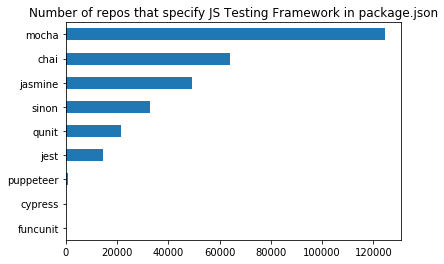

In [883]:
df_num_fw.plot.barh();
plt.gca().invert_yaxis()
plt.title('Number of repos that specify JS Testing Framework in package.json');

## Exploratory Data Analysis

## When did those github repos created?

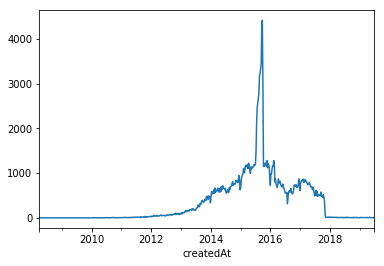

In [884]:
df_combined.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count().plot();


What is that spike in 2015! Let's take a look at data in that period to find out what is going on.

In [885]:
# df_combined = df_combined[df_combined['stargazers_count'] > 5]
start_date = '07-01-2015'
end_date = '11-01-2015'
df_2015_suspect = df_combined[(df_combined['createdAt'] >= start_date) & ((df_combined['createdAt'] < end_date))]


In [886]:
df_2015_suspect.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count()

createdAt
2015-07-05 00:00:00+00:00     835
2015-07-12 00:00:00+00:00    1504
2015-07-19 00:00:00+00:00    2122
2015-07-26 00:00:00+00:00    2457
2015-08-02 00:00:00+00:00    2577
2015-08-09 00:00:00+00:00    2668
2015-08-16 00:00:00+00:00    2802
2015-08-23 00:00:00+00:00    3171
2015-08-30 00:00:00+00:00    3233
2015-09-06 00:00:00+00:00    3340
2015-09-13 00:00:00+00:00    3437
2015-09-20 00:00:00+00:00    4295
2015-09-27 00:00:00+00:00    4414
2015-10-04 00:00:00+00:00    2953
2015-10-11 00:00:00+00:00    1151
2015-10-18 00:00:00+00:00    1171
2015-10-25 00:00:00+00:00    1158
2015-11-01 00:00:00+00:00    1102
Freq: W-SUN, Name: repo_name, dtype: int64

Looks like some thing is going on between a week of 2015-07-19 to 2015-10-11. Let's zoom into this datarange

In [887]:
df_2015_suspect = df_2015_suspect[(df_2015_suspect['createdAt'] >= '07-15-2015') & ((df_combined['createdAt'] < '10-15-2015'))]


/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [888]:
df_2015_suspect.shape

(38648, 19)

In [889]:
df_2015_suspect.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,38648.000000,38648.000000,38648.000000,38648.000000
mean,23.014697,-0.314324,3.865194,3.650331
std,538.393438,6.592202,78.798977,81.670859
min,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,78895.000000,968.000000,8947.000000,10982.000000


More than half of the data in this range have **releases_count == -1**! (To be precise, around 70% of repos created during this time range have releases_count == -1. See the code cell below)

I took a look at a few of those repos and all of them are **forked repos!** 
Something might have happened during that time but I could not find any solid incidense or events that might have introduced this behavior online.

In [890]:
# Number of repos with releases_count == -1 during the suspect period
sum(df_2015_suspect['releases_count'] < 0)

26913

In [891]:
# Ration of repos with releases_count == -1 during the suspect period
sum(df_2015_suspect['releases_count'] < 0)/df_2015_suspect.shape[0]

0.6963620368453737

Since the forked repos will not give us much insights, we will drop repos with where "releases_count == -1" from the original combined dataset and inspect the createdOn of the remain repos

In [892]:
df_combined_clean = df_combined[df_combined['releases_count'] >= 0]

After droping those repos, we are left with only 19863 repos which is **around 68%** of the original dataset

In [893]:
df_combined_clean.shape

(137793, 19)

In [894]:
df_combined.shape

(202705, 19)

In [895]:
df_combined_clean.shape[0] / df_combined.shape[0]

0.6797710959275794

Let's plot a line chart for the createdAt data again. 

Now we get a smoother plot **EXCEPT** that there is a big drop of a number of projects around the end of 2017.

/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


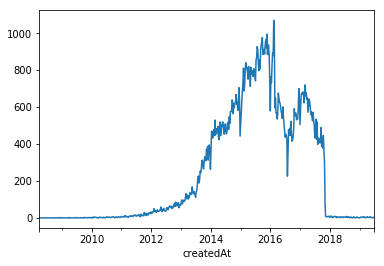

In [896]:
df_combined_clean.groupby(pd.Grouper(key='createdAt', freq='W'))['repo_name'].count().plot();


However, if we look at the updatedAt data, most of those repos have recently been updated in 2019.

Is GitHub's recent annoucement in 2019 to get [unlimited free private repos](https://techcrunch.com/2019/01/07/github-free-users-now-get-unlimited-private-repositories/) contribute to a drop of a number of public repos created recently? (I even moved a few of my repos to private after this new year resolution was rolled out)

Nevertheless, since most of the remaining repos are active (which is a good thing for our analysis) and we have a good number of repos with a varity of testing frameworks to analyze, I will proceed with this data.

/Users/nongnoochr/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


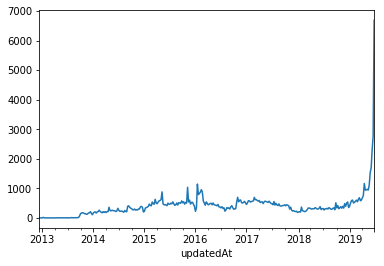

In [897]:
# Inspect the updatedAt data
df_updatedAt = df_combined_clean.groupby(pd.Grouper(key='updatedAt', freq='W'))['repo_name'].count()
df_updatedAt.plot();

Let's zoom into updatedAt data > '01-01-2019'. We can see that most repos in this dataset have recently been updated


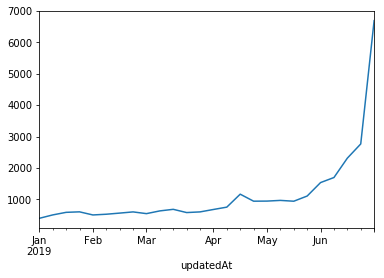

In [898]:
df_updatedAt[df_updatedAt.index > '01-01-2019'].plot();

In [899]:
df_updatedAt[df_updatedAt.index > '01-01-2019']

updatedAt
2019-01-06 00:00:00+00:00     397
2019-01-13 00:00:00+00:00     505
2019-01-20 00:00:00+00:00     587
2019-01-27 00:00:00+00:00     603
2019-02-03 00:00:00+00:00     504
2019-02-10 00:00:00+00:00     527
2019-02-17 00:00:00+00:00     563
2019-02-24 00:00:00+00:00     601
2019-03-03 00:00:00+00:00     546
2019-03-10 00:00:00+00:00     633
2019-03-17 00:00:00+00:00     683
2019-03-24 00:00:00+00:00     580
2019-03-31 00:00:00+00:00     601
2019-04-07 00:00:00+00:00     678
2019-04-14 00:00:00+00:00     753
2019-04-21 00:00:00+00:00    1165
2019-04-28 00:00:00+00:00     942
2019-05-05 00:00:00+00:00     945
2019-05-12 00:00:00+00:00     967
2019-05-19 00:00:00+00:00     941
2019-05-26 00:00:00+00:00    1106
2019-06-02 00:00:00+00:00    1534
2019-06-09 00:00:00+00:00    1695
2019-06-16 00:00:00+00:00    2311
2019-06-23 00:00:00+00:00    2763
2019-06-30 00:00:00+00:00    6686
Freq: W-SUN, Name: repo_name, dtype: int64

To reflect the current user behavior, let's analyze only repos that have been updated in the past one year (From June 2018 - now which is late June 29th 2019)

Now, let's take a look at how many of those repos use each of the interested JS Testing Framework

In [900]:
df_combined_final = df_combined_clean[(df_combined_clean['updatedAt'] >= '06-01-2018')]


This leaves us with around 40k projects (or around 20%) of original data we can work with which is a reasonable amount of data to be analyzed

In [901]:
df_combined_final.shape

(40560, 19)

In [902]:
df_combined_final.shape[0] / df_combined.shape[0]

0.20009373227103427

In [903]:
df_combined_final.describe()

,stargazers_count,releases_count,issues_count,forks_count
count,40560.000000,40560.000000,40560.000000,40560.000000
mean,266.787081,4.671893,50.876011,47.255079
std,2063.828846,27.351635,347.733028,512.702296
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,3.000000,3.000000
75%,50.000000,2.000000,18.000000,13.000000
max,142451.000000,3467.000000,18589.000000,65869.000000


Let's also look at a distribution of each JS Testing Framework of this dataset

In [904]:
cols_testing_fw = [
    'qunit',
    'mocha',
    'jest',
    'jasmine',
    'funcunit',        
    'puppeteer',
    'cypress',
    'chai',
    'sinon'
]

df_num_fw = df_combined_final[cols_testing_fw].sum().sort_values(ascending=False)

In [905]:
df_num_fw

mocha        26234
chai         14383
sinon         7252
jasmine       6601
jest          5253
qunit         2591
puppeteer      427
cypress        160
funcunit         5
dtype: int64

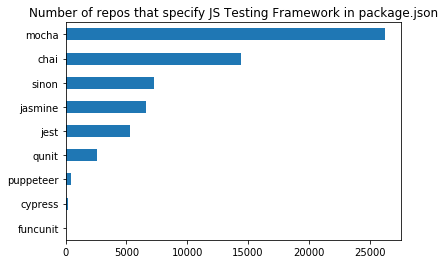

In [906]:
df_num_fw.plot.barh();
plt.gca().invert_yaxis()
plt.title('Number of repos that specify JS Testing Framework in package.json');

Let's find a ratio of a number of repositories that use each JS Testing Framework/Lib. 

Note that it is possible that the same repo list multiple frameworks in package.json, e.g. It is common to see mocha+chai in the same package.json. sinon is a mocking framework that can use with any testing framework, etc. 

In [907]:
(df_num_fw / df_combined_final.shape[0]) * 100

mocha        64.679487
chai         35.461045
sinon        17.879684
jasmine      16.274655
jest         12.951183
qunit         6.388067
puppeteer     1.052761
cypress       0.394477
funcunit      0.012327
dtype: float64

Before we move on with the analysis, let's save this final dataset so that we don't need to repeat the steps above again

In [908]:
df_combined_final.to_csv('data/github_package_deps_June_2018_to_June_2019.csv', index=False)

## What are the top github repos that uses each framework and what are common packages installed with it?

Let's find out how many repos that use one of the following frameworks: qunit, mocha, jest, jasmine

In [909]:
sum(df_combined_final['qunit'] | df_combined_final['mocha'] | df_combined_final['jest'] | df_combined_final['jasmine'])

39186

There are about 12400 repos that use one of the interested JS Testing Frameworks

Create a dataframe containing repos that use each framework

In [910]:
col_subset = ['repo_name',
 'createdAt',
 'updatedAt',
 'stargazers_count',
 'releases_count',
 'issues_count',
 'forks_count',
 'primaryLanguage',
 'languages',
 'package_dep']

df_qunit = df_combined_final[df_combined_final['qunit']][col_subset]
df_mocha = df_combined_final[df_combined_final['mocha']][col_subset]
df_jest = df_combined_final[df_combined_final['jest']][col_subset]
df_jasmine = df_combined_final[df_combined_final['jasmine']][col_subset]

dict_df = OrderedDict()
dict_df['qunit'] = df_qunit
dict_df['mocha'] = df_mocha
dict_df['jest'] = df_jest
dict_df['jasmine'] = df_jasmine

Let's create a function that we will use to print out a summary of each framework

In [911]:
def print_framework_summary(dict_df, fw_name):
    print('****** Framework: {} ******'.format(fw_name))
    df = dict_df[fw_name]
    
    print('Number of repos: {}\n'.format(df.shape[0]))
    
    # Find the most common package dependencies
    # https://stackoverflow.com/questions/41007797/pandas-find-most-frequent-values-in-columns-of-lists
    sum_deps = sum(df['package_dep'], [])
    c_deps = Counter(sum_deps)
    
    # --- Top repos (in terms of stargazers_count) that use this framework
    print('Top repos that uses "{}":\n'.format(fw_name))
    
    df_temp_top_stargazers = df.sort_values(by=['stargazers_count'], ascending=False).iloc[0:20,:][['repo_name', 'stargazers_count', 'createdAt']].reset_index(drop=True)
    df_temp_top_stargazers['Age (years)'] = round(df_temp_top_stargazers['createdAt'].apply(lambda x:  (pd.Timestamp.utcnow() - x)).dt.days / 365, 1)
    df_temp_top_stargazers = df_temp_top_stargazers.drop(columns=['createdAt'])
    print(df_temp_top_stargazers)

    
    df_plot = df_temp_top_stargazers[['repo_name', 'stargazers_count']].reset_index(drop=True)    
    
    df_plot = df_plot.set_index('repo_name')
    df_plot.plot.barh()
    plt.gca().invert_yaxis()
    plt.title('Top repos that uses "{}"'.format(fw_name));
    print('\n')
    
    # --- Top common packages
    print('Top common packages:\n')
    
    top_deps =  c_deps.most_common(10)
    for cur_top_dep in top_deps:
        print('{}: {}'.format(cur_top_dep[0], cur_top_dep[1]))
        
    df_plot = pd.DataFrame(top_deps, columns=['package_name', 'count'])
    df_plot = df_plot.set_index('package_name')
    
    df_plot.plot.barh()
    plt.gca().invert_yaxis()
    plt.title('Number of common packages that listed with "{}"'.format(fw_name));
    
    return df, c_deps
    

### QUnit

****** Framework: qunit ******
Number of repos: 2591

Top repos that uses "qunit":

                              repo_name  stargazers_count  Age (years)
0                        twbs/bootstrap            134291          7.9
1                       mrdoob/three.js             52682          9.3
2                         jquery/jquery             51826         10.2
3                     hakimel/reveal.js             47067          8.1
4                         moment/moment             41620          8.3
5                    impress/impress.js             34879          7.5
6                    jashkenas/backbone             27500          8.8
7                  jashkenas/underscore             24619          9.7
8                       select2/select2             23704          7.3
9                      emberjs/ember.js             21067          8.1
10                   hammerjs/hammer.js             20195          7.3
11                    Prinzhorn/skrollr             18258       

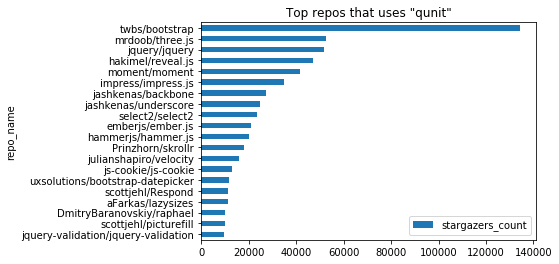

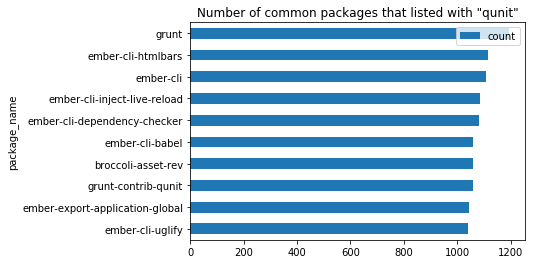

In [912]:
_, dep_qunit = print_framework_summary(dict_df, 'qunit');

In [913]:
dep_qunit.most_common(30)

[('grunt', 1193),
 ('ember-cli-htmlbars', 1116),
 ('ember-cli', 1107),
 ('ember-cli-inject-live-reload', 1086),
 ('ember-cli-dependency-checker', 1080),
 ('ember-cli-babel', 1059),
 ('broccoli-asset-rev', 1059),
 ('grunt-contrib-qunit', 1058),
 ('ember-export-application-global', 1042),
 ('ember-cli-uglify', 1039),
 ('grunt-contrib-uglify', 1014),
 ('grunt-contrib-jshint', 1001),
 ('ember-cli-htmlbars-inline-precompile', 985),
 ('grunt-contrib-watch', 902),
 ('ember-disable-prototype-extensions', 898),
 ('ember-resolver', 881),
 ('ember-cli-sri', 878),
 ('loader.js', 869),
 ('ember-load-initializers', 860),
 ('ember-cli-qunit', 844),
 ('ember-source', 711),
 ('grunt-contrib-connect', 668),
 ('ember-cli-eslint', 665),
 ('ember-try', 653),
 ('grunt-contrib-cssmin', 580),
 ('express', 530),
 ('ember-cli-app-version', 526),
 ('ember-ajax', 523),
 ('eslint-plugin-ember', 509),
 ('eslint-plugin-node', 487)]

### Mocha

****** Framework: mocha ******
Number of repos: 26234

Top repos that uses "mocha":

                           repo_name  stargazers_count  Age (years)
0                          vuejs/vue            142451          5.9
1                  electron/electron             74662          6.2
2                        axios/axios             61335          4.9
3                          atom/atom             49149          7.4
4                 socketio/socket.io             46765          9.3
5                  expressjs/express             44454         10.0
6             h5bp/html5-boilerplate             43006          9.4
7                    ElemeFE/element             38822          2.8
8   thedaviddias/Front-End-Checklist             34831          1.7
9        google/material-design-lite             31303          4.5
10                       gulpjs/gulp             31287          6.0
11                    TryGhost/Ghost             30237          6.2
12             zurb/foundation-

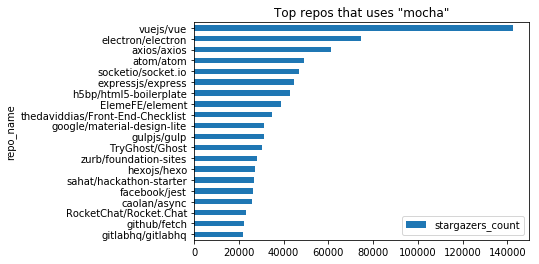

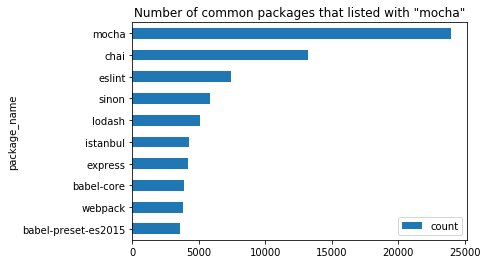

In [914]:
_, dep_mocha = print_framework_summary(dict_df, 'mocha');

In [915]:
dep_mocha.most_common(30)

[('mocha', 23991),
 ('chai', 13220),
 ('eslint', 7429),
 ('sinon', 5823),
 ('lodash', 5116),
 ('istanbul', 4269),
 ('express', 4180),
 ('babel-core', 3841),
 ('webpack', 3836),
 ('babel-preset-es2015', 3609),
 ('gulp', 3559),
 ('should', 3332),
 ('coveralls', 3219),
 ('babel-eslint', 3140),
 ('babel-loader', 3043),
 ('karma', 3034),
 ('request', 2844),
 ('grunt', 2701),
 ('babel-cli', 2604),
 ('rimraf', 2575),
 ('eslint-plugin-import', 2451),
 ('karma-mocha', 2392),
 ('async', 2377),
 ('nyc', 2361),
 ('typescript', 2343),
 ('react', 2244),
 ('body-parser', 2216),
 ('sinon-chai', 2110),
 ('eslint-plugin-react', 2048),
 ('karma-chrome-launcher', 2009)]

### Jest

****** Framework: jest ******
Number of repos: 5253

Top repos that uses "jest":

                              repo_name  stargazers_count  Age (years)
0                        facebook/react            131762          6.1
1                       webpack/webpack             49656          7.3
2                 ant-design/ant-design             48179          4.2
3                  typicode/json-server             41014          5.6
4                          zeit/next.js             38452          2.7
5          PanJiaChen/vue-element-admin             36011          2.2
6                       gatsbyjs/gatsby             35940          4.1
7                           babel/babel             33625          4.8
8                     prettier/prettier             32511          2.6
9                             koajs/koa             26476          5.9
10                        facebook/jest             26189          5.6
11  styled-components/styled-components             24541         

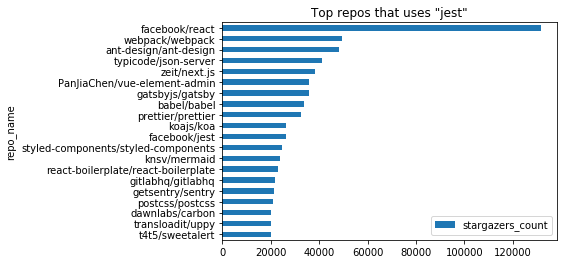

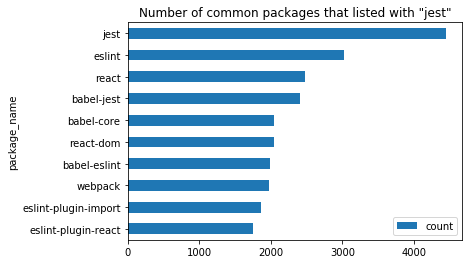

In [916]:
_, dep_jest = print_framework_summary(dict_df, 'jest');

In [917]:
dep_jest.most_common(30)

[('jest', 4454),
 ('eslint', 3020),
 ('react', 2474),
 ('babel-jest', 2405),
 ('babel-core', 2042),
 ('react-dom', 2041),
 ('babel-eslint', 1992),
 ('webpack', 1976),
 ('eslint-plugin-import', 1859),
 ('eslint-plugin-react', 1753),
 ('babel-loader', 1724),
 ('prettier', 1330),
 ('react-test-renderer', 1293),
 ('css-loader', 1261),
 ('enzyme', 1151),
 ('rimraf', 1143),
 ('prop-types', 1131),
 ('typescript', 1127),
 ('style-loader', 1126),
 ('babel-cli', 1125),
 ('babel-preset-react', 1117),
 ('eslint-plugin-jsx-a11y', 1088),
 ('babel-preset-es2015', 1056),
 ('webpack-dev-server', 1039),
 ('lodash', 1023),
 ('@types/jest', 981),
 ('redux', 964),
 ('file-loader', 955),
 ('husky', 929),
 ('@babel/core', 913)]

### Jasmine

****** Framework: jasmine ******
Number of repos: 6601

Top repos that uses "jasmine":

                repo_name  stargazers_count  Age (years)
0               vuejs/vue            142451          5.9
1          facebook/react            131762          6.1
2             axios/axios             61335          4.9
3      angular/angular.js             59570          9.5
4         angular/angular             49308          4.8
5               atom/atom             49149          7.4
6        chartjs/Chart.js             44132          6.3
7     Dogfalo/materialize             36020          4.8
8          adobe/brackets             29889          7.6
9          mozilla/pdf.js             27104          8.2
10       nylas/nylas-mail             24388          4.7
11          quilljs/quill             23195          6.9
12      gitlabhq/gitlabhq             21866          7.7
13    angular/angular-cli             21846          4.1
14             vuejs/vuex             20813          4.0


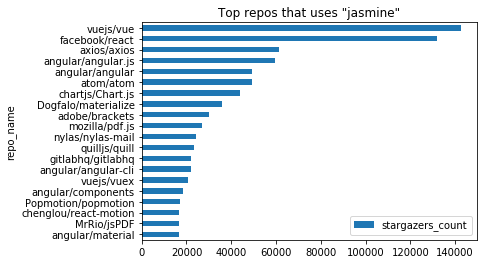

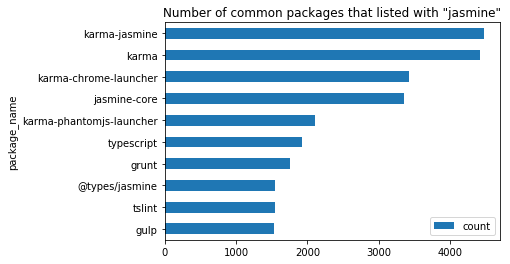

In [918]:
_, dep_jasmine = print_framework_summary(dict_df, 'jasmine');

In [919]:
dep_jasmine.most_common(30)

[('karma-jasmine', 4469),
 ('karma', 4415),
 ('karma-chrome-launcher', 3423),
 ('jasmine-core', 3352),
 ('karma-phantomjs-launcher', 2113),
 ('typescript', 1927),
 ('grunt', 1758),
 ('@types/jasmine', 1548),
 ('tslint', 1541),
 ('gulp', 1526),
 ('karma-coverage', 1499),
 ('protractor', 1412),
 ('@types/node', 1370),
 ('rxjs', 1354),
 ('karma-firefox-launcher', 1348),
 ('zone.js', 1318),
 ('@angular/core', 1278),
 ('@angular/compiler', 1274),
 ('grunt-contrib-uglify', 1269),
 ('@angular/common', 1263),
 ('@angular/platform-browser', 1261),
 ('@angular/platform-browser-dynamic', 1256),
 ('jasmine', 1242),
 ('grunt-contrib-watch', 1237),
 ('core-js', 1213),
 ('grunt-contrib-jshint', 1195),
 ('webpack', 1144),
 ('@angular/compiler-cli', 1106),
 ('@angular/forms', 1091),
 ('lodash', 1086)]